# Three observations about the results of the studuy:

* 1. According to the evolution of the tumor volume, clearly only the drug Capomulin showed to contribute to the reduction of the tumor volume (mm3). This medicine reduced the volume by about 20%.

* 2. As for the metastasis sites, an increase in their number was observed for all drugs. However, the lowest number of sites was observed for the drug Capomulin.

* 3. In relation to point 1, mice subject to the drug Capomulin showed a significantly higher survival rate compared to other subjects treated with other drugs.

In [19]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
#import warnings
#warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = '../DATA-Pymaceuticals/mouse_drug_data.csv'
clinical_trial_data_to_load = '../DATA-Pymaceuticals/clinicaltrial_data.csv'

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
#mouse_drug_data.head()

clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)
#clinical_trial_data.head()

# Combine the data into a single dataset
combined_data = pd.merge(clinical_trial_data, mouse_drug_data, how = 'left', on = 'Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [20]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
combined_data_group = combined_data.groupby(['Drug', 'Timepoint'])
Mean = combined_data_group['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
Mean = pd.DataFrame(Mean)
Mean = Mean.reset_index()

# Preview DataFrame
Mean

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [21]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
combined_data_group = combined_data.groupby(['Drug', 'Timepoint'])
StdError = combined_data_group['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
StdError = pd.DataFrame(StdError)
StdError = StdError.reset_index()

# Preview DataFrame
StdError.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [22]:
# Minor Data Munging to Re-Format the Data Frames
# 1. Mean:
Munged_Mean = Mean.pivot(index = 'Timepoint', columns ='Drug', values = 'Tumor Volume (mm3)') 

# 2. Standar Error
Munged_StdError = StdError.pivot(index = 'Timepoint', columns ='Drug', values = 'Tumor Volume (mm3)') 

In [23]:
# Preview that Reformatting worked (means)
Munged_Mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [24]:
# Preview that Reformatting worked (errors)
Munged_StdError.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


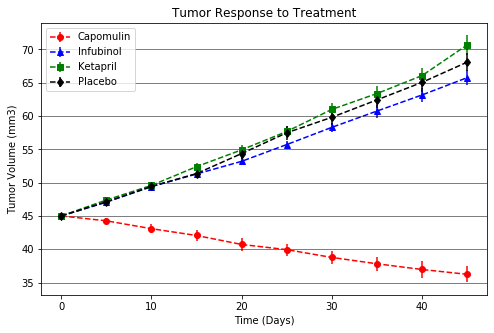

In [25]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(len(Munged_Mean))
Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
tick_locations = [value for value in x_axis]
plt.figure(figsize = (8, 5))
plt.errorbar(Time, Munged_Mean['Capomulin'], yerr = Munged_StdError['Capomulin'], label = 'Capomulin', marker = 'o', color = 'red', linestyle = '--')
plt.errorbar(Time, Munged_Mean['Infubinol'], yerr = Munged_StdError['Infubinol'], label = 'Infubinol', marker = '^', color = 'blue', linestyle = '--')
plt.errorbar(Time, Munged_Mean['Ketapril'], yerr = Munged_StdError['Ketapril'], label = 'Ketapril', marker = 's', color = 'green', linestyle = '--')
plt.errorbar(Time, Munged_Mean['Placebo'], yerr = Munged_StdError['Placebo'], label = 'Placebo', marker = 'd', color = 'black', linestyle = '--')
#plt.xlim(0,50)
plt.axhline(y = 35, color = 'black', linestyle='-', linewidth = 0.5)
plt.axhline(y = 40, color = 'black', linestyle='-', linewidth = 0.5)
plt.axhline(y = 45, color = 'black', linestyle='-', linewidth = 0.5)
plt.axhline(y = 50, color = 'black', linestyle='-', linewidth = 0.5)
plt.axhline(y = 55, color = 'black', linestyle='-', linewidth = 0.5)
plt.axhline(y = 60, color = 'black', linestyle='-', linewidth = 0.5)
plt.axhline(y = 65, color = 'black', linestyle='-', linewidth = 0.5)
plt.axhline(y = 70, color = 'black', linestyle='-', linewidth = 0.5)
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()

# Save the Figure
plt.savefig("treatment.png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [26]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
combined_data_group = combined_data.groupby(['Drug', 'Timepoint'])
Mean_Met = combined_data_group['Metastatic Sites'].mean()

# Convert to DataFrame
Mean_Met = pd.DataFrame(Mean_Met)

# Preview DataFrame
Mean_Met.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [27]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
combined_data_group = combined_data.groupby(['Drug', 'Timepoint'])
StdError_Met = combined_data_group['Metastatic Sites'].sem()

# Convert to DataFrame
StdError_Met = pd.DataFrame(StdError_Met)

# Preview DataFrame
StdError_Met.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [28]:
# Minor Data Munging to Re-Format the Data Frames
# 1. Mean:
Mean_Met = Mean_Met.reset_index()
Munged_Mean_Met = Mean_Met.pivot(index = 'Timepoint', columns ='Drug', values = 'Metastatic Sites')

# 2. Standar Error
StdError_Met = StdError_Met.reset_index()
Munged_StdError_Met = StdError_Met.pivot(index = 'Timepoint', columns ='Drug', values = 'Metastatic Sites')

In [29]:
# Preview that Reformatting worked (means)
Munged_Mean_Met.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [30]:
# Preview that Reformatting worked (errors)
Munged_StdError_Met.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


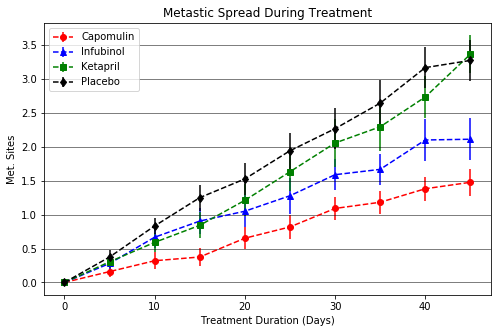

In [31]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(len(Munged_Mean_Met))
Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
tick_locations = [value for value in x_axis]
plt.figure(figsize = (8, 5))
plt.errorbar(Time, Munged_Mean_Met['Capomulin'], yerr = Munged_StdError_Met['Capomulin'], label = 'Capomulin', marker = 'o', color = 'red', linestyle = '--')
plt.errorbar(Time, Munged_Mean_Met['Infubinol'], yerr = Munged_StdError_Met['Infubinol'], label = 'Infubinol', marker = '^', color = 'blue', linestyle = '--')
plt.errorbar(Time, Munged_Mean_Met['Ketapril'], yerr = Munged_StdError_Met['Ketapril'], label = 'Ketapril', marker = 's', color = 'green', linestyle = '--')
plt.errorbar(Time, Munged_Mean_Met['Placebo'], yerr = Munged_StdError_Met['Placebo'], label = 'Placebo', marker = 'd', color = 'black', linestyle = '--')
#plt.xlim(0,50)
plt.axhline(y = 0.0, color = 'black', linestyle='-', linewidth = 0.5)
plt.axhline(y = 0.5, color = 'black', linestyle='-', linewidth = 0.5)
plt.axhline(y = 1.0, color = 'black', linestyle='-', linewidth = 0.5)
plt.axhline(y = 1.5, color = 'black', linestyle='-', linewidth = 0.5)
plt.axhline(y = 2.0, color = 'black', linestyle='-', linewidth = 0.5)
plt.axhline(y = 2.5, color = 'black', linestyle='-', linewidth = 0.5)
plt.axhline(y = 3.0, color = 'black', linestyle='-', linewidth = 0.5)
plt.axhline(y = 3.5, color = 'black', linestyle='-', linewidth = 0.5)
plt.title('Metastic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.legend()

# Save the Figure
plt.savefig("spread.png")

# Show the Figure
plt.show()

## Survival Rates

In [32]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
combined_data_group = combined_data.groupby(['Drug', 'Timepoint'])
Count = combined_data_group['Tumor Volume (mm3)'].count()

# Convert to DataFrame
Count = pd.DataFrame(Count)
Count = Count.reset_index()

# Preview DataFrame
Count.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [33]:
# Minor Data Munging to Re-Format the Data Frames
Munged_Count = Count.pivot(index = 'Timepoint', columns ='Drug', values = 'Tumor Volume (mm3)')

# Preview the Data Frame
Munged_Count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


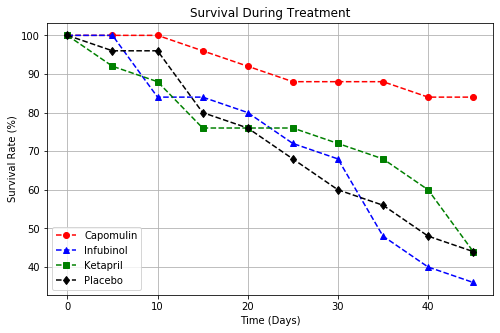

In [34]:
# Generate the Plot (Accounting for percentages)
x_axis = np.arange(len(Munged_Count))
Time = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
tick_locations = [value for value in x_axis]
plt.figure(figsize = (8, 5))
plt.plot(Time, 100*Munged_Count['Capomulin']/25, label = 'Capomulin', marker = 'o', color = 'red', linestyle = '--')
plt.plot(Time, 100*Munged_Count['Infubinol']/25, label = 'Infubinol', marker = '^', color = 'blue', linestyle = '--')
plt.plot(Time, 100*Munged_Count['Ketapril']/25, label = 'Ketapril', marker = 's', color = 'green', linestyle = '--')
plt.plot(Time, 100*Munged_Count['Placebo']/25, label = 'Placebo', marker = 'd', color = 'black', linestyle = '--')

#plt.xlim(0,50)
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.legend()
plt.grid()

# Save the Figure
plt.savefig("suvival.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [35]:
# Calculate the percent changes for each drug
Intial_Tumor_Volume = 45
Percent_Change = ((Munged_Mean.loc[45, :] - Intial_Tumor_Volume)/Intial_Tumor_Volume)*100

# Display the data to confirm
Percent_Change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: 45, dtype: float64

/Applications/anaconda/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


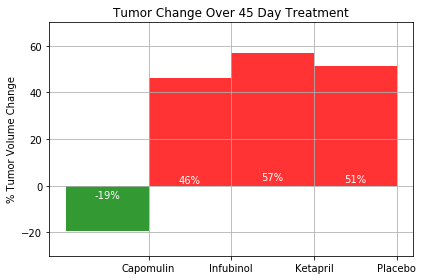

In [36]:
# Store all Relevant Percent Changes into a Tuple
Relevant_Percent_Changes = tuple(zip(Percent_Change.index, Percent_Change))
Relevant_Percent_Changes_list = list(Relevant_Percent_Changes)

# Splice the data between passing and failing drugs
Pass_Drugs_list = []
Fail_Drugs_list = []
index_Pass_Drugs_list = []
index_Fail_Drugs_list = []
for i, Percent in Relevant_Percent_Changes_list:
    if Percent > 0 :
        Pass_Drugs_list.append(Percent)
        index_Pass_Drugs_list.append(i)
    else :
        Fail_Drugs_list.append(Percent)
        index_Fail_Drugs_list.append(i)
Pass_Drugs = list(zip(index_Pass_Drugs_list, Pass_Drugs_list))
Fail_Drugs = list(zip(index_Fail_Drugs_list, Fail_Drugs_list))

# Orient widths. Add labels, tick marks, etc. 
fig, ax = plt.subplots()
y_value1 = [Percent_Change["Infubinol"], Percent_Change["Ketapril"], Percent_Change["Placebo"]]
x_axis1 = [0]
y_value2 = Percent_Change["Capomulin"]
x_axis2 = [1, 2, 3]
bars1 = ax.bar(x_axis1, y_value2, color = 'g', alpha = 0.8, align = "edge", width = -1)
bars2 = ax.bar(x_axis2, y_value1, color = 'r', alpha = 0.8, align = "edge", width = -1)
x_labels = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
plt.setp(ax, xticks=[0, 1, 2, 3], xticklabels = x_labels, yticks=[-20, 0, 20, 40, 60])
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_ylabel('% Tumor Volume Change')
plt.ylim(-30, 70)
ax.grid()

# Use functions to label the percentages of changes
def AutoLabels(BARS):
    for bar in BARS:
        Height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, 0.1*Height, 
                '%d' %int(Height)+ "%", 
                ha = 'center', 
                va = 'top', color = 'white')

# Call functions to implement the function calls     
AutoLabels(bars1)
AutoLabels(bars2)
fig.tight_layout()

# Save the Figure
plt.savefig('change.png')

# Show the Figure
fig.show()